In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os


In [48]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
dataset=pd.read_csv("concrete.csv")
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### We can see all columns are numerical however lets confirm it wether there is any column type object

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [51]:
## Function for cheking the missing values
def missingValues(df):
    print("The number of missing values")
    for i in df:
        count=0
        if df[i].isnull==True:
            count+=1
        print(i,":",count)

In [52]:
#Function to visualise outliers
def PlotOutliers(df):
    print("Visualising outliers.................")
    for i in df:
        fig=plt.figure()
        sns.boxplot(df[i])

In [53]:
#Function to number of outliers
def outliers_cc(df):
    print("No of outliers.....................")
    for i in df:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-1.5*IQR
        upperbound=Q3+1.5*IQR
        cnt=0
        for k in df[i].values:
            if (k<lowerbound or k>upperbound):
                cnt+=1
        print(i,'=','Q1: ',Q1,'Q3: ',Q3,'IQR: ',IQR,'lowerbound: ',lowerbound,'upperbound: ',upperbound,'outlier count: ',cnt)


The number of missing values
cement : 0
slag : 0
ash : 0
water : 0
superplastic : 0
coarseagg : 0
fineagg : 0
age : 0
strength : 0
No of outliers.....................
cement = Q1:  192.375 Q3:  350.0 IQR:  157.625 lowerbound:  -44.0625 upperbound:  586.4375 outlier count:  0
slag = Q1:  0.0 Q3:  142.95 IQR:  142.95 lowerbound:  -214.42499999999998 upperbound:  357.375 outlier count:  2
ash = Q1:  0.0 Q3:  118.3 IQR:  118.3 lowerbound:  -177.45 upperbound:  295.75 outlier count:  0
water = Q1:  164.9 Q3:  192.0 IQR:  27.099999999999994 lowerbound:  124.25000000000001 upperbound:  232.64999999999998 outlier count:  9
superplastic = Q1:  0.0 Q3:  10.2 IQR:  10.2 lowerbound:  -15.299999999999999 upperbound:  25.5 outlier count:  10
coarseagg = Q1:  932.0 Q3:  1029.4 IQR:  97.40000000000009 lowerbound:  785.8999999999999 upperbound:  1175.5000000000002 outlier count:  0
fineagg = Q1:  730.9499999999999 Q3:  824.0 IQR:  93.05000000000007 lowerbound:  591.3749999999998 upperbound:  963.575 ou

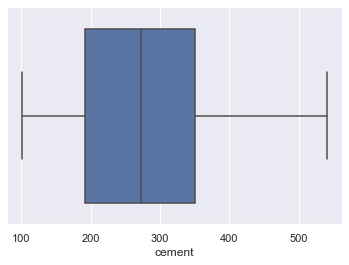

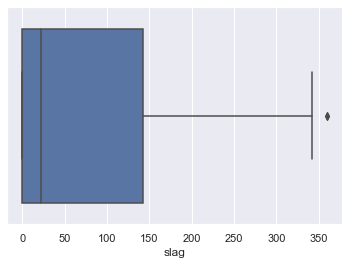

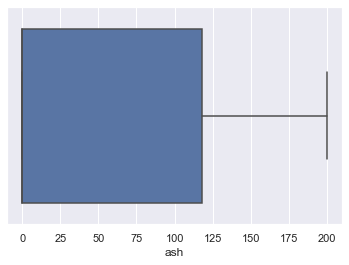

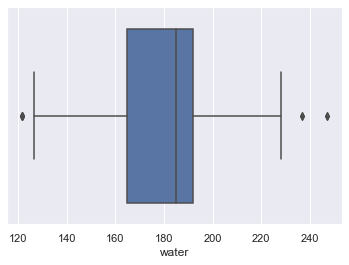

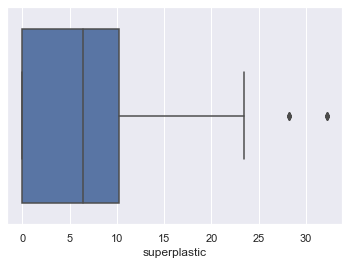

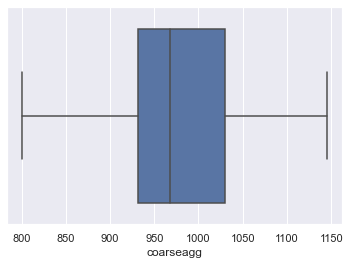

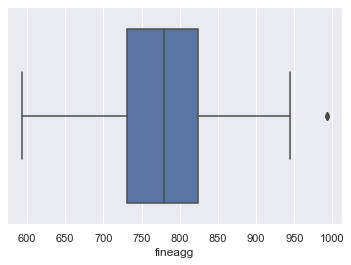

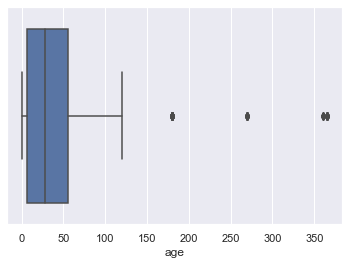

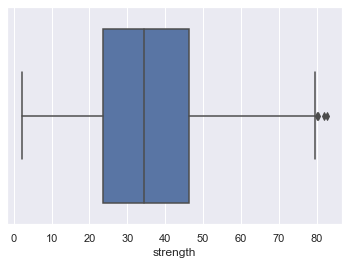

In [54]:
# Passing all functions through pipeline
pipe=make_pipeline((missingValues(dataset)),(outliers_cc(dataset)),(PlotOutliers(dataset)))

##  Let us do a pair plot analysis to visually check number of likely clusters

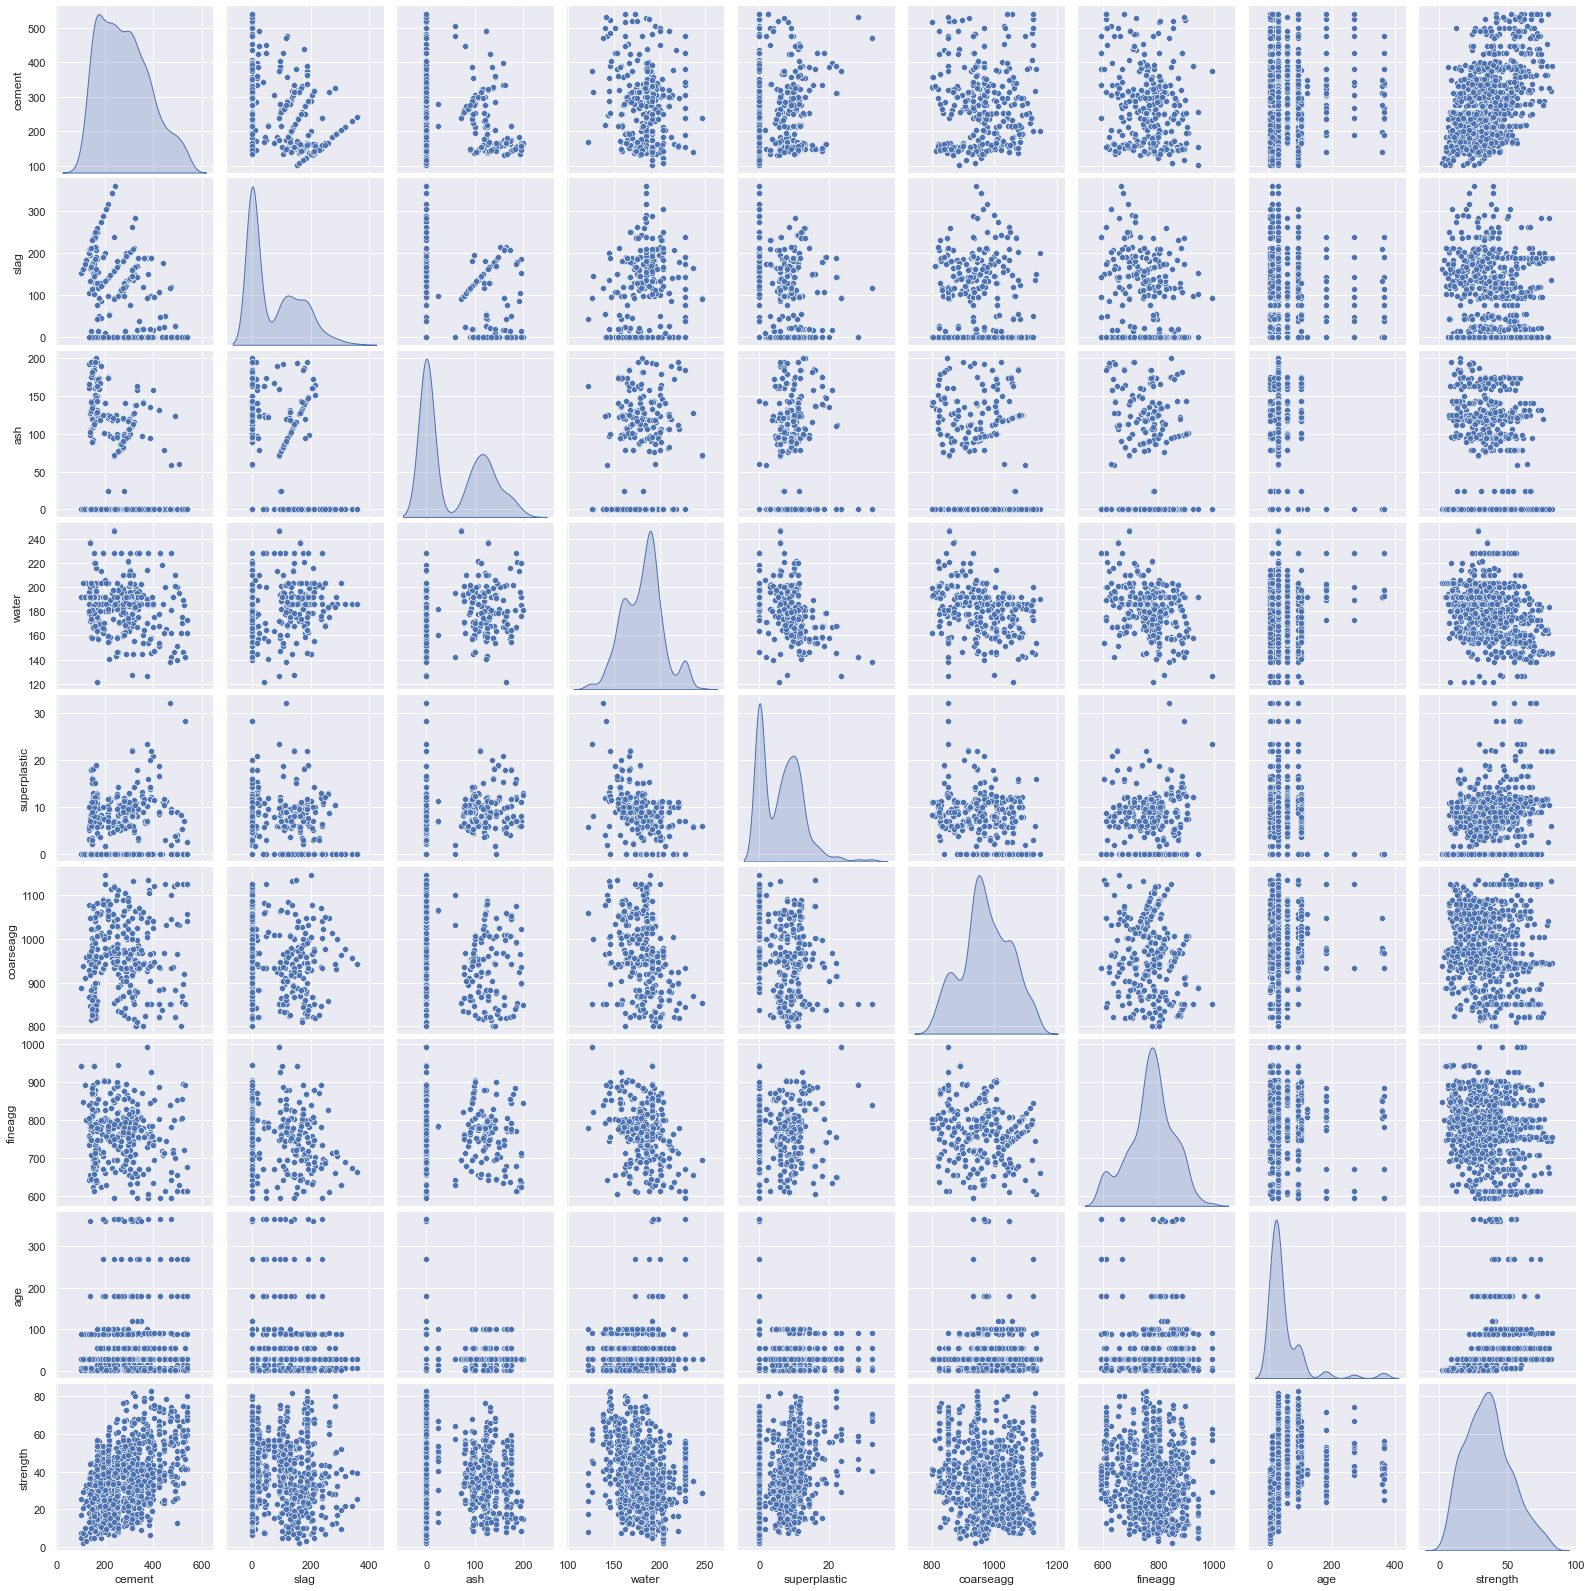

In [55]:
sns.pairplot(dataset.iloc[:,0:],diag_kind='kde')

### Splitting and standardizing data

In [56]:
# X = dataset.drop(['strength'],axis=1).apply(sts.zscore)
X = dataset.drop(['strength'],axis=1)

In [57]:
# Splitting the data 
Y=dataset['strength']
# X=dataset.drop(['strength'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [58]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28


In [59]:
X_test.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90
244,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90
882,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14
567,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7


## Building Model on Raw Data

In [60]:
clr = svm.SVR()  
t=clr.fit(X_train , y_train)

In [61]:
y_pred = clr.predict(X_test)

0.6419917812863057


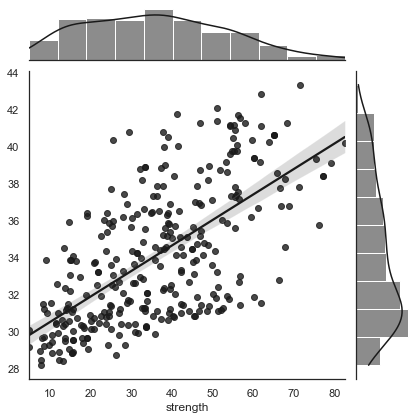

In [62]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
print(sts.pearsonr(y_test,y_pred)[0])


## Iteration 2

In [63]:
#Drop coarseagg column based on the above visual analysis

X.pop('coarseagg')
X.pop('fineagg')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred_2 = clr.predict(X_test)

0.8207005373213877


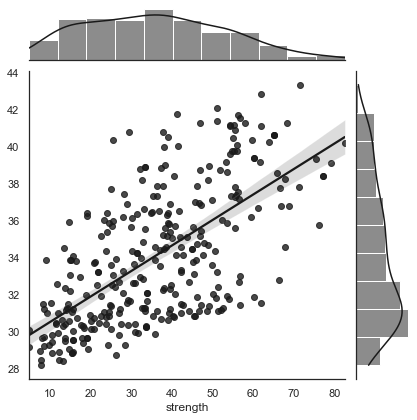

In [64]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");
print(sts.pearsonr(y_test,y_pred_2)[0])


In [65]:
# Achieved 85% on the test data. The low score is due to the large spread and apparent mix of gaussians
# Let us explore the data for hidden clusters

## KMeans Clustering

In [66]:
cluster_range=range(4,8)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=5)
    clusters.fit(dataset)
    labels=clusters.labels_
    cetroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,4,2.198833e+07
1,5,1.986372e+07
2,6,1.795195e+07
3,7,1.617628e+07


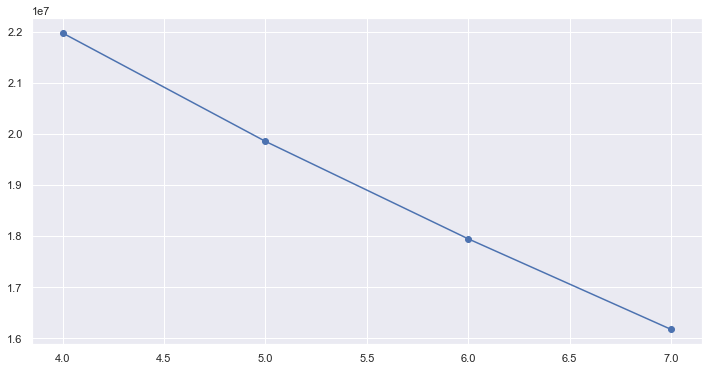

In [67]:
# elbo plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

The elbow plot confirms our visual analysis that there are likely 6 good clusters

In [68]:
X_k=dataset.copy()
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(X_k)

prediction=cluster.predict(X_k)
X_k["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

X_k_copy = X_k.copy(deep = True)  

In [69]:
centroids = cluster.cluster_centers_
centroids

array([[2.19449367e+02, 1.22816456e+01, 1.07221835e+02, 1.72619937e+02,
        7.41455696e+00, 1.02469937e+03, 8.09723101e+02, 3.73006329e+01,
        2.97438291e+01],
       [3.06391975e+02, 1.81036420e+02, 1.51364198e+01, 1.82666049e+02,
        7.21790123e+00, 9.38217284e+02, 7.24100000e+02, 3.26111111e+01,
        4.61244444e+01],
       [3.67231313e+02, 3.24242424e+01, 4.09449495e+01, 1.75477273e+02,
        8.45000000e+00, 9.06929293e+02, 8.28115657e+02, 3.55808081e+01,
        4.03737879e+01],
       [4.23519685e+02, 1.48251969e+01, 1.90708661e+01, 1.86620472e+02,
        3.12755906e+00, 1.02781969e+03, 6.98555906e+02, 3.22204724e+01,
        4.00690551e+01],
       [1.58683516e+02, 1.75083516e+02, 4.91796703e+01, 1.90968132e+02,
        4.44065934e+00, 9.50059341e+02, 7.68792857e+02, 3.23351648e+01,
        2.69686813e+01],
       [3.38715556e+02, 6.07955556e+01, 0.00000000e+00, 2.14955556e+02,
        1.77635684e-15, 9.62097778e+02, 6.89053333e+02, 2.87555556e+02,
        4.5

In [70]:
centroid_df = pd.DataFrame(centroids, columns = list(dataset) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,219.449367,12.281646,107.221835,172.619937,7.414557e+00,1024.699367,809.723101,37.300633,29.743829
1,306.391975,181.036420,15.136420,182.666049,7.217901e+00,938.217284,724.100000,32.611111,46.124444
2,367.231313,32.424242,40.944949,175.477273,8.450000e+00,906.929293,828.115657,35.580808,40.373788
3,423.519685,14.825197,19.070866,186.620472,3.127559e+00,1027.819685,698.555906,32.220472,40.069055
4,158.683516,175.083516,49.179670,190.968132,4.440659e+00,950.059341,768.792857,32.335165,26.968681
5,338.715556,60.795556,0.000000,214.955556,1.776357e-15,962.097778,689.053333,287.555556,45.115778


Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F0D032C88>,
      dtype=object)

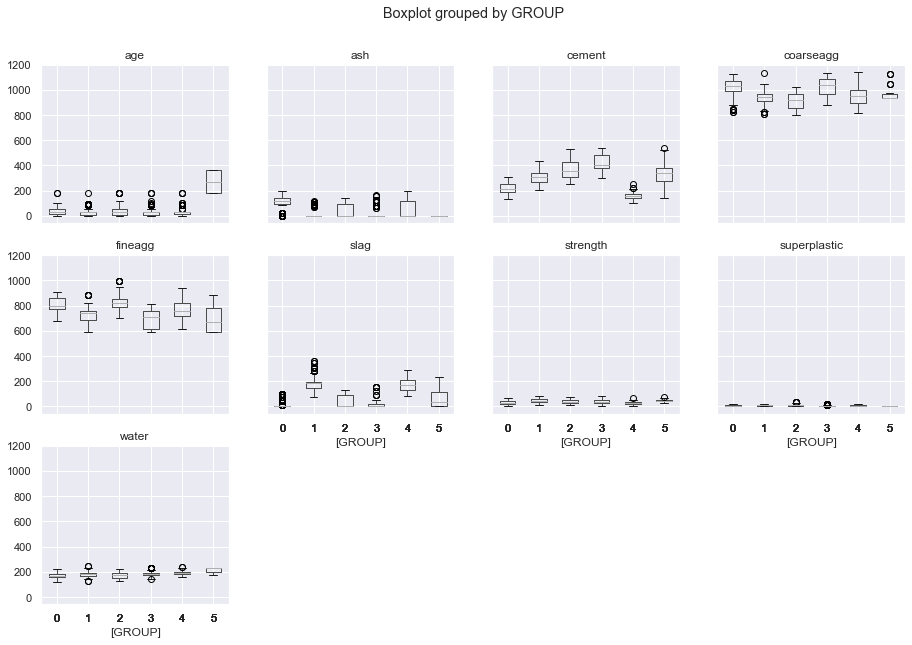

In [71]:
X_k.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

There are many outliers on each dimension  (indicated by the black circles)
Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


### Identifying outliers

In [72]:
data = X_k  
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(X_k['GROUP']))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EA8F64188>,
      dtype=object)

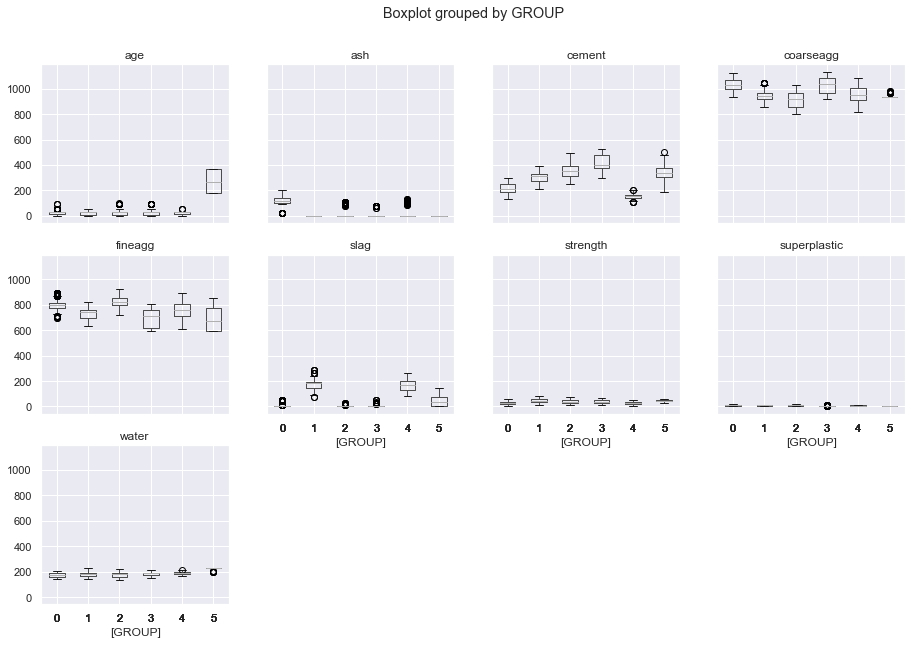

In [73]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 10))

Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them

### Let us analyze the strength column vs other columns group wise. 

In [74]:
def columnsAnalyse(df):
    cols=[]
    for i in df:
        cols.append(i)
    for i in cols:
        var=i
#         print(i)
        with sns.axes_style("white"):
            plot = sns.lmplot(var,'strength',data=df,hue='GROUP')
        

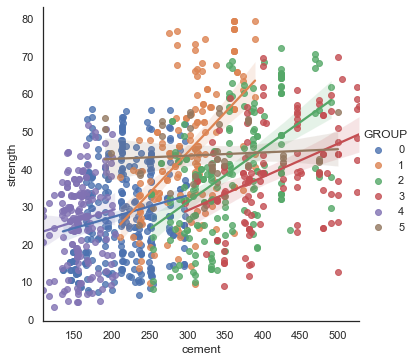

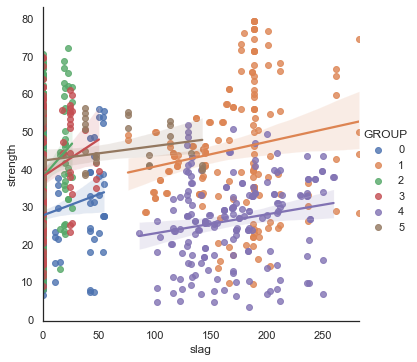

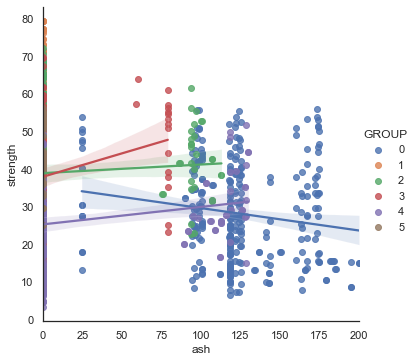

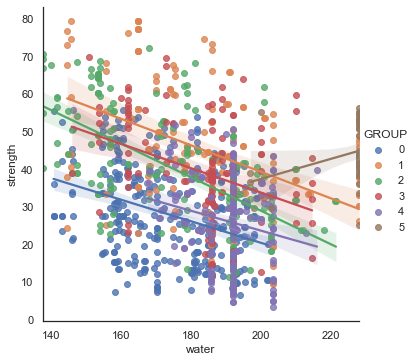

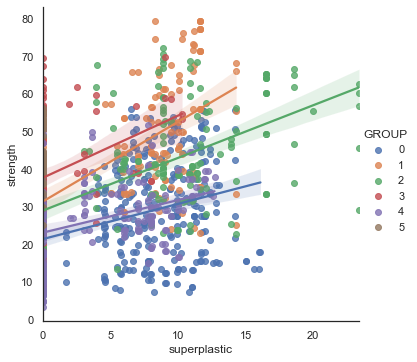

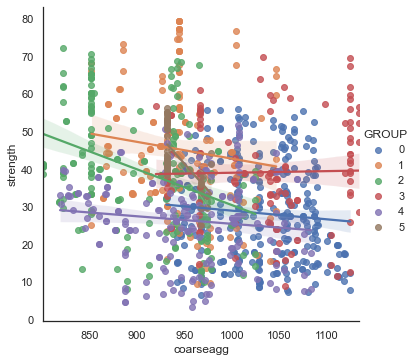

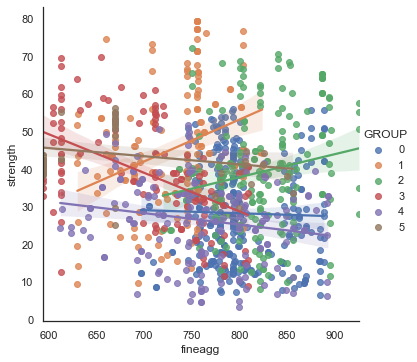

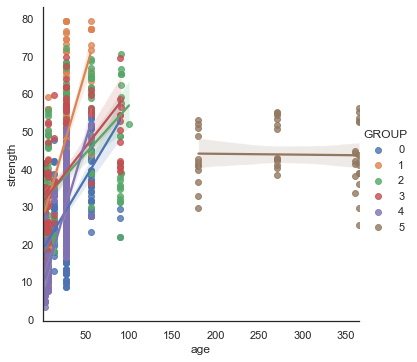

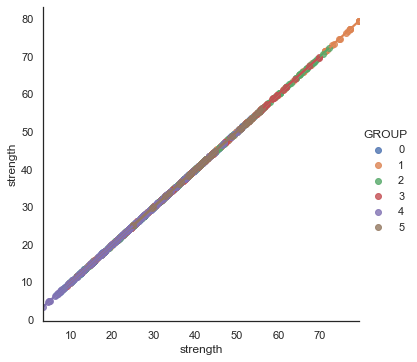

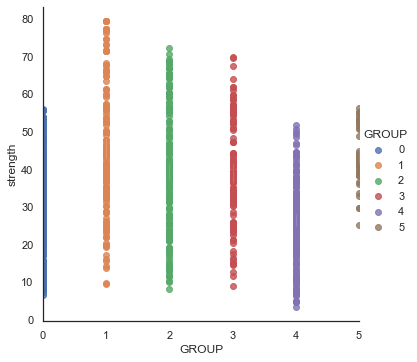

In [75]:
columnsAnalyse(concat_data)

### Break clusters into separate datasets and analyze individually.

In [76]:
# Let us break the data into largecar and smallcar segments

gorup_0 = concat_data[concat_data['GROUP']==0]
group_1 = concat_data[concat_data['GROUP']==1]
group_2 = concat_data[concat_data['GROUP']==2]
group_3 = concat_data[concat_data['GROUP']==3]
group_4 = concat_data[concat_data['GROUP']==4]
group_5 = concat_data[concat_data['GROUP']==5]

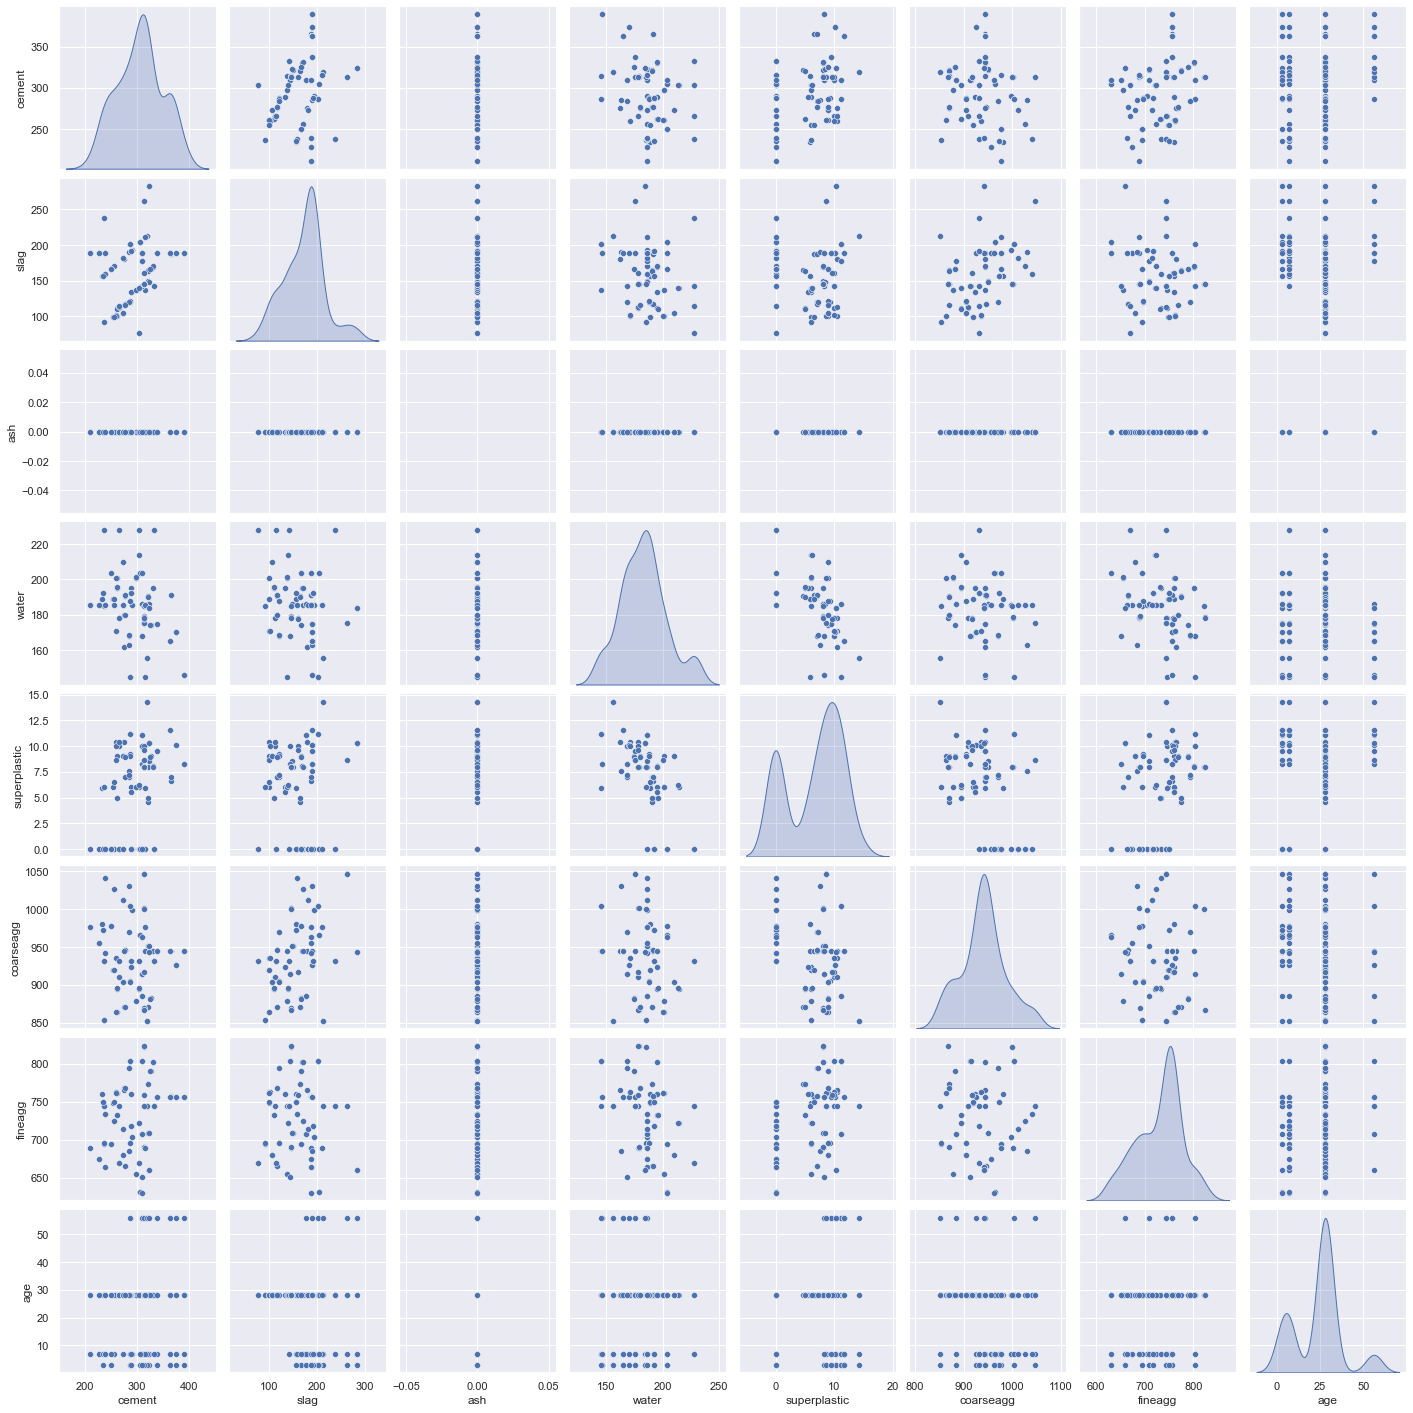

In [77]:
X_attr = group_1.iloc[:, 0:8]

sns.pairplot(X_attr, diag_kind='kde')   # to plot density curve instead of histogram

In [79]:
X_attr.shape

(162, 8)

In [80]:
clr = svm.SVR()  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

In [81]:
print(X_test[12:13])
y_pred[12]

     cement   slag  ash  water  superplastic  age
982   284.0  119.7  0.0  168.3           7.2   28


37.143105840366246

In [88]:
print(dataset[120:121].drop(['coarseagg','fineagg','strength'],axis=1))
print(clr.predict(dataset[120:121].drop(['coarseagg','fineagg','strength'],axis=1)))


     cement  slag  ash  water  superplastic  age
120   331.0   0.0  0.0  192.0           0.0    7
[27.86729427]


In [89]:
X_test.shape

(309, 6)

0.8207005373213877


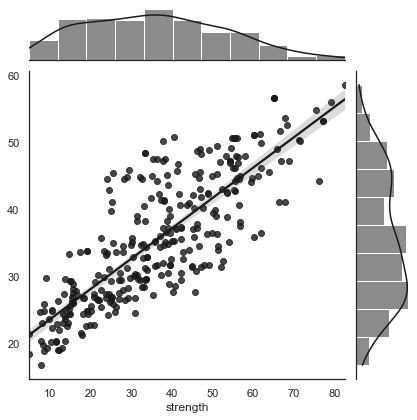

In [90]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k")
print(sts.pearsonr(y_test,y_pred)[0])

In [91]:
pickle.dump(clr,open('Finalmodel.pkl','wb'))